In [2]:
pip install eli5 lime dalex neattext spacy seaborn altair streamlit scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import neattext.functions as nfx

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df= pd.read_csv("emotion_dataset_2.csv")

In [14]:
print(df)

       Unnamed: 0  Emotion                                               Text
0               0  neutral                                             Why ? 
1               1      joy    Sage Act upgrade on my to do list for tommorow.
2               2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3               3      joy   Such an eye ! The true hazel eye-and so brill...
4               4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
...           ...      ...                                                ...
34792       34792    anger                                         Go to hell
34793       34793      joy                             This is a cool subject
34794       34794  neutral                             There is nothing to do
34795       34795    anger                                     Fuck this shit
34796       34796     fear                                He is gonna kill me

[34797 rows x 3 columns]


In [15]:
df['Emotion'].value_counts()

joy         11036
sadness      6729
fear         5411
anger        4301
surprise     4062
neutral      2255
disgust       856
shame         146
Anger           1
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

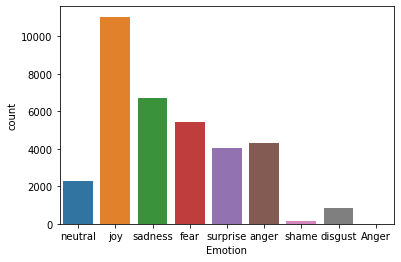

In [16]:
sns.countplot(x='Emotion',data=df)

In [17]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [18]:
df['clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [19]:
print(df['clean_Text'])

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
                               ...                        
34792                                           Go to hell
34793                               This is a cool subject
34794                               There is nothing to do
34795                                       Fuck this shit
34796                                  He is gonna kill me
Name: clean_Text, Length: 34797, dtype: object


In [20]:
df['clean_Text']=df['clean_Text'].apply(nfx.remove_stopwords)

In [21]:
df


,Unnamed: 0,Emotion,Text,clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34792,34792,anger,Go to hell,hell
34793,34793,joy,This is a cool subject,cool subject
34794,34794,neutral,There is nothing to do,
34795,34795,anger,Fuck this shit,Fuck shit


In [22]:
xfeatures=df['clean_Text']
ylabels=df['Emotion']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(xfeatures,ylabels,test_size=0.3,random_state=42)

In [24]:
#Build Pipeline
from sklearn.pipeline import Pipeline

In [25]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='lbfgs', max_iter=1000))])

In [26]:
#Train Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [27]:
pipe_lr.score(x_test,y_test)

0.6256704980842912

In [28]:
sentence='This is interensting Subject'

In [29]:
pipe_lr.predict([sentence])

array(['anger'], dtype=object)

In [30]:
pipe_lr.predict_proba([sentence])

array([[0.26103797, 0.03406828, 0.11399556, 0.21502791, 0.22518911,
        0.09350317, 0.00281091, 0.05436708]])

In [31]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [32]:
import joblib
pipeline_file= open("emotion_classifier_pipe_lr2.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()